# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.146808


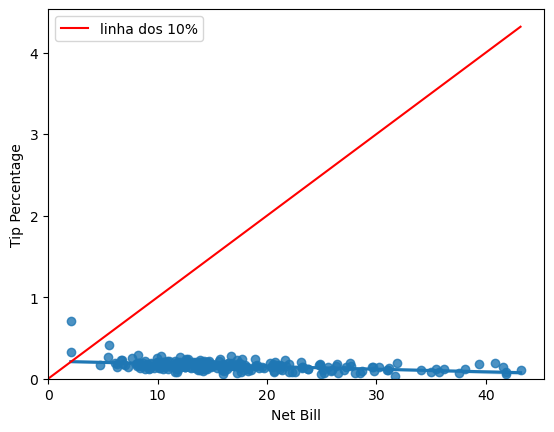

In [3]:
sns.regplot(y='tip_pct', x='net_bill', data=tips)
x = np.linspace(0, tips['net_bill'].max(), 100)
y = 0.1 * x
plt.plot(x, y, '-r', label='linha dos 10%')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     56.25
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           1.21e-12
Time:                        15:25:56   Log-Likelihood:                 361.93
No. Observations:                 244   AIC:                            -719.9
Df Residuals:                     242   BIC:                            -712.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2162      0.008     26.401      0.0

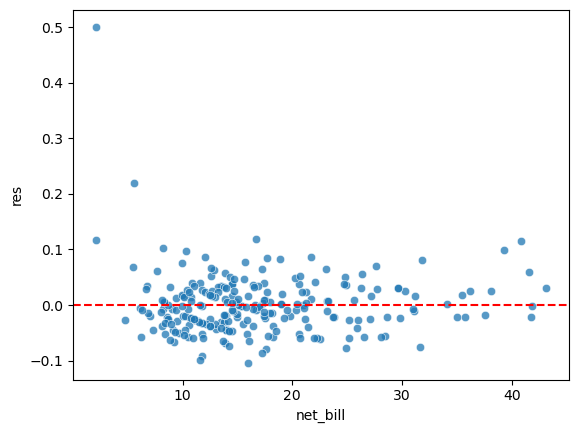

In [4]:
reg = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     98.21
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           1.19e-19
Time:                        15:25:56   Log-Likelihood:                 377.99
No. Observations:                 244   AIC:                            -752.0
Df Residuals:                     242   BIC:                            -745.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3468      0.019  

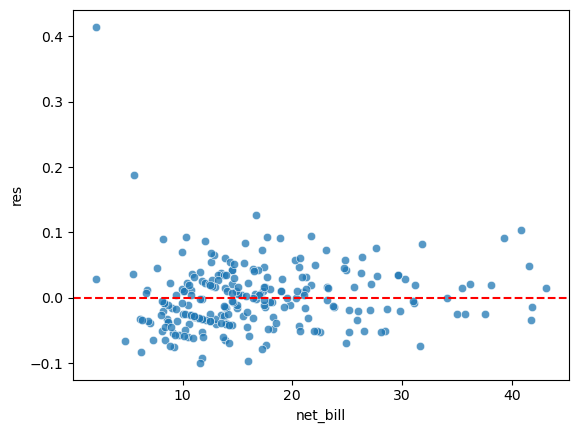

In [5]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     37.97
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           4.62e-15
Time:                        15:25:56   Log-Likelihood:                 369.85
No. Observations:                 244   AIC:                            -733.7
Df Residuals:                     241   BIC:                            -723.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.27

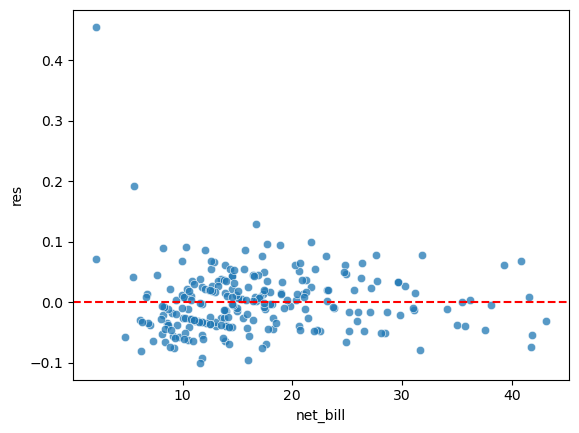

In [6]:
reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data=tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     77.95
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           2.18e-16
Time:                        15:25:56   Log-Likelihood:                -55.678
No. Observations:                 244   AIC:                             115.4
Df Residuals:                     242   BIC:                             122.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5264      0.045    -33.658      0.0

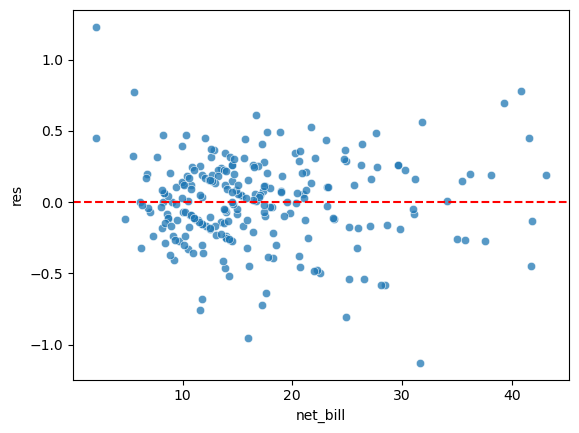

In [7]:
reg = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [9]:
tips['pred_y'] = np.exp(reg.fittedvalues)

print(f"O R² desse modelo com log de `tips_pct` é: {tips[['pred_y', 'tip_pct']].corr().iloc[0,1]**2}")

O R² desse modelo com log de `tips_pct` é: 0.21064162661306013


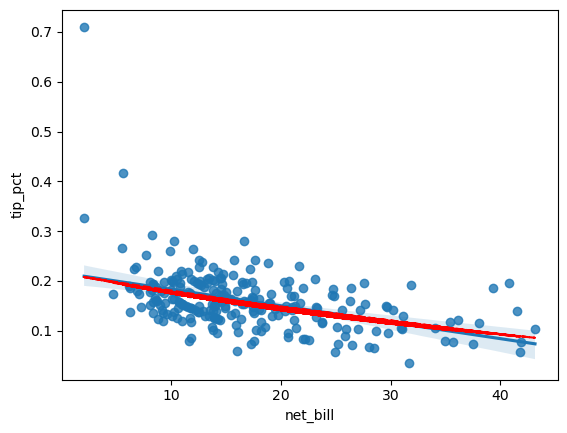

In [10]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], tips['pred_y'], 'r,--')
plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     94.10
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           5.26e-19
Time:                        15:25:56   Log-Likelihood:                -49.670
No. Observations:                 244   AIC:                             103.3
Df Residuals:                     242   BIC:                             110.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.8373      0.110  

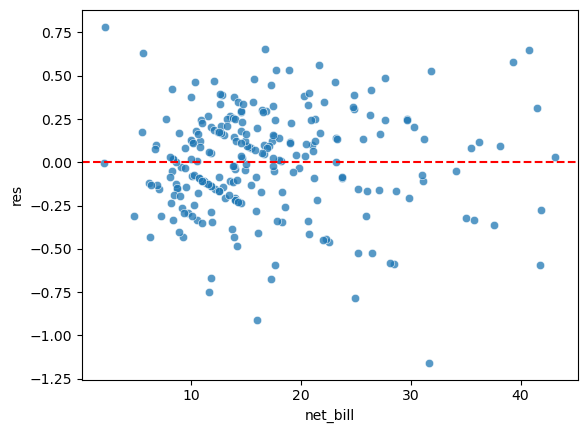

In [11]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [12]:
tips['pred_y'] = np.exp(reg.fittedvalues)

print(f"O R² desse modelo com log de `tips_pct` é: {tips[['pred_y', 'tip_pct']].corr().iloc[0,1]**2}")

O R² desse modelo com log de `tips_pct` é: 0.34165683240978123


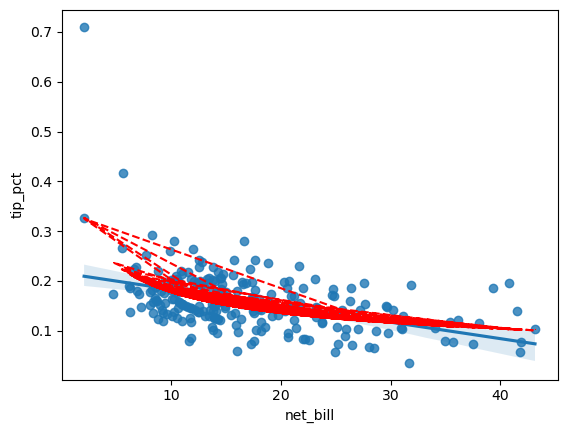

In [13]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], tips['pred_y'], 'r,--')
plt.show()

###  6. qual modelo resultou no melhor ajuste?

Acredito que o modelo que melhor se ajustou no fim, foi o ultimo modelo, usando o log de y e o log de x, respectivamente os logs de `tip_pct` e `net_bill`, com o maior R² entre os modelos: 0.341; E com um grafico de residuos mais disperso e independente.